In [1]:
# Initialization
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy
import scipy.fft
import numpy as np

import helper_functions # local file helper_functions.py

filename = 'sounds/windowing_test.wav'

# read from storage
fs, data = wavfile.read(filename)
data = data[:,0]

window_length_ms = 30
window_step_ms = window_length_ms/2
spectrum_length = 5000
window_length = int(window_length_ms*fs/1000)
window_step = int(window_step_ms*fs/1000)
windowing_function = np.sin(np.pi*np.arange(0.5,window_length,1)/window_length)**2
total_length = len(data)

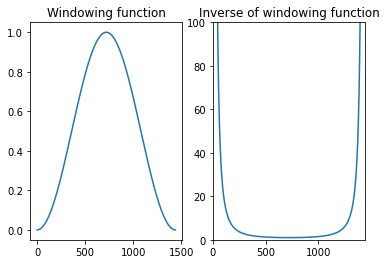

In [2]:
plt.subplot(121)
plt.plot(windowing_function)
plt.title('Windowing function')
plt.subplot(122)
plt.plot(windowing_function**-1)
plt.axis([0, window_length, 0, 100])
plt.title('Inverse of windowing function')
plt.show()

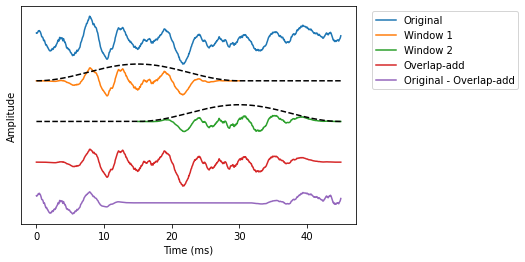

In [3]:
# choose segment from random position in sample
starting_position1 =  np.random.randint(total_length - window_length - window_step)
starting_position2 = starting_position1 + window_step
data_vectorx = data[starting_position1:(starting_position1+window_length+window_step)]
data_vector1 = data[starting_position1:(starting_position1+window_length),]
window1 = data_vector1*windowing_function
time_vector1 = np.linspace(0,window_length_ms,window_length)

data_vector2 = data[starting_position2:(starting_position2+window_length),]
window2 = data_vector2*windowing_function
time_vector2 = np.linspace(0,window_length_ms,window_length)+window_step_ms

zero_vector = np.zeros(window_step,)
time_vectorx = np.linspace(0,window_length_ms+window_step_ms,window_length+window_step)
window1x = np.concatenate((window1,zero_vector))
window2x = np.concatenate((zero_vector,window2))

window_fn1 = np.concatenate((windowing_function,zero_vector))
window_fn2 = np.concatenate((zero_vector,windowing_function))
window_scale = np.max(np.abs(data_vectorx))*.7
window_fn1 *= window_scale
window_fn2 *= window_scale

# overlap add
window_ola = window1x + window2x

display_shift = np.max(np.abs(data_vector1))*1.7

fig, ax = plt.subplots()
ax.plot(time_vectorx,data_vectorx,label='Original')
ax.plot(time_vector1,window1-display_shift,label='Window 1')
ax.plot(time_vector2,window2-display_shift*2,label='Window 2')
ax.plot(time_vectorx,window_ola-display_shift*3,label='Overlap-add')
ax.plot(time_vectorx,data_vectorx-window_ola-display_shift*4,label='Original - Overlap-add')
ax.plot(time_vectorx,window_fn1-display_shift,'k--')
ax.plot(time_vectorx,window_fn2-display_shift*2,'k--')
ax.legend(bbox_to_anchor=(1.5, 1),loc='upper right')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Amplitude')
ax.set_yticks([])
plt.show()

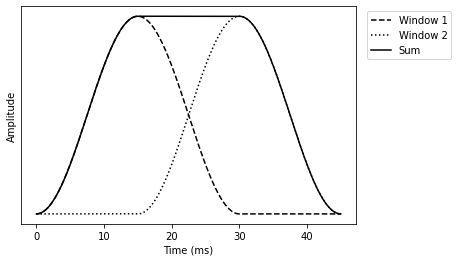

In [4]:
fig, ax = plt.subplots()
ax.plot(time_vectorx,window_fn1,'k--',label='Window 1')
ax.plot(time_vectorx,window_fn2,'k:',label='Window 2')
ax.plot(time_vectorx,window_fn1+window_fn2,'k',label='Sum')
ax.legend(bbox_to_anchor=(1.3, 1),loc='upper right')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Amplitude')
ax.set_yticks([])
plt.show()

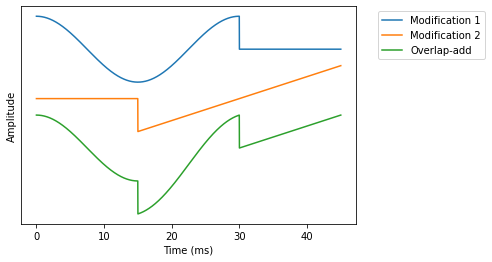

In [5]:
# choose segment from random position in sample
zero_vector = np.zeros(window_step,)
time_vectorx = np.linspace(0,window_length_ms+window_step_ms,window_length+window_step)

# modifications
mod1 = np.cos(np.linspace(0,2*np.pi,window_length))
mod2 = np.linspace(-1,1,window_length)
mod1x = np.concatenate((mod1,zero_vector))
mod2x = np.concatenate((zero_vector,mod2))

# overlap add
window_ola = mod1x + mod2x

display_shift = 1.5

fig, ax = plt.subplots()
ax.plot(time_vectorx,mod1x,label='Modification 1')
ax.plot(time_vectorx,mod2x-display_shift*1,label='Modification 2')
ax.plot(time_vectorx,window_ola-display_shift*2,label='Overlap-add')
ax.legend(bbox_to_anchor=(1.4, 1),loc='upper right')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Amplitude')
ax.set_yticks([])
plt.show()

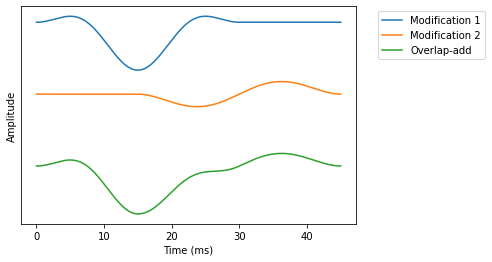

In [6]:
# choose segment from random position in sample
zero_vector = np.zeros(window_step,)
time_vectorx = np.linspace(0,window_length_ms+window_step_ms,window_length+window_step)

# modifications
mod1 = np.cos(np.linspace(0,2*np.pi,window_length))*windowing_function
mod2 = np.linspace(-1,1,window_length)*windowing_function
mod1x = np.concatenate((mod1,zero_vector))
mod2x = np.concatenate((zero_vector,mod2))

# overlap add
window_ola = mod1x + mod2x

display_shift = 1.5

fig, ax = plt.subplots()
ax.plot(time_vectorx,mod1x,label='Modification 1')
ax.plot(time_vectorx,mod2x-display_shift*1,label='Modification 2')
ax.plot(time_vectorx,window_ola-display_shift*2,label='Overlap-add')
ax.legend(bbox_to_anchor=(1.4, 1),loc='upper right')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Amplitude')
ax.set_yticks([])
plt.show()

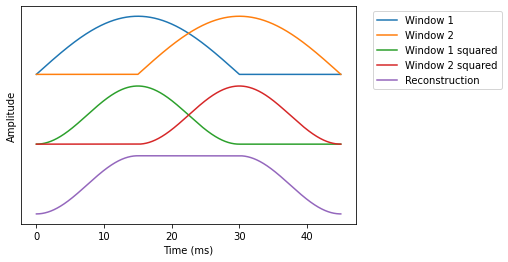

In [7]:
windowing_function = np.sin(np.pi*np.arange(0.5,window_length,1)/window_length)

zero_vector = np.zeros(window_step,)
time_vectorx = np.linspace(0,window_length_ms+window_step_ms,window_length+window_step)

win1x = np.concatenate((windowing_function,zero_vector))
win2x = np.concatenate((zero_vector,windowing_function))

reconstruction = win1x**2 + win2x**2
display_shift = 1.2

fig, ax = plt.subplots()
ax.plot(time_vectorx,win1x,label='Window 1')
ax.plot(time_vectorx,win2x,label='Window 2')
ax.plot(time_vectorx,win1x**2-display_shift*1,label='Window 1 squared')
ax.plot(time_vectorx,win2x**2-display_shift*1,label='Window 2 squared')
ax.plot(time_vectorx,reconstruction-display_shift*2,label='Reconstruction')
ax.legend(bbox_to_anchor=(1.45, 1),loc='upper right')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Amplitude')
ax.set_yticks([])
plt.show()